# MS proteomics data analysis

In [1]:
source("https://bioconductor.org/biocLite.R")
biocLite()
biocLite(c("limma"))
library(limma)
library(heatmaply)
library(RColorBrewer)

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.1 (2017-06-30).
Old packages: 'annotate', 'BH', 'bindr', 'bindrcpp', 'biomaRt', 'bit', 'blob',
  'broom', 'callr', 'ChemmineR', 'cluster', 'commonmark', 'covr', 'curl',
  'd3heatmap', 'data.table', 'DBI', 'dbplyr', 'dendextend', 'desc', 'devtools',
  'dplyr', 'EBImage', 'ellipse', 'forcats', 'foreign', 'futile.options',
  'gdtools', 'GenomicAlignments', 'GenomicFeatures', 'GenomicRanges', 'git2r',
  'GlobalOptions', 'haven', 'hexbin', 'hms', 'httpuv', 'imageHTS', 'IRdisplay',
  'kernlab', 'knitr', 'lambda.r', 'listviewer', 'lubridate', 'maps', 'MASS',
  'Matrix', 'matrixStats', 'MCMCpack', 'MCPAN', 'mgcv', 'migest', 'miniUI',
  'modelr', 'mratios', 'nlme', 'officer', 'openssl', 'pbdZMQ', 'pcaPP',
  'pill


The downloaded binary packages are in
	/var/folders/rg/srm_l7bx76l4q54xwrg_xv551z72j_/T//Rtmpo9vJFX/downloaded_packages


Old packages: 'annotate', 'BH', 'bindr', 'bindrcpp', 'biomaRt', 'bit', 'blob',
  'broom', 'callr', 'ChemmineR', 'cluster', 'commonmark', 'covr', 'curl',
  'd3heatmap', 'data.table', 'DBI', 'dbplyr', 'dendextend', 'desc', 'devtools',
  'dplyr', 'EBImage', 'ellipse', 'forcats', 'foreign', 'futile.options',
  'gdtools', 'GenomicAlignments', 'GenomicFeatures', 'GenomicRanges', 'git2r',
  'GlobalOptions', 'haven', 'hexbin', 'hms', 'httpuv', 'imageHTS', 'IRdisplay',
  'kernlab', 'knitr', 'lambda.r', 'listviewer', 'lubridate', 'maps', 'MASS',
  'Matrix', 'matrixStats', 'MCMCpack', 'MCPAN', 'mgcv', 'migest', 'miniUI',
  'modelr', 'mratios', 'nlme', 'officer', 'openssl', 'pbdZMQ', 'pcaPP',
  'pillar', 'plogr', 'processx', 'pryr', 'psych', 'quantreg', 'R.oo', 'rcdk',
  'Rcpp', 'Rcssplot', 'RCurl', 'readxl', 'repr', 'reprex', 'rgl', 'rjson',
  'RMariaDB', 'rmarkdown', 'RMySQL', 'robustbase', 'rpart', 'rrcov', 'RSQLite',
  'rtracklayer', 'rvg', 'selectr', 'shape', 'shiny', 'shinydashboard',
  'sig

In [2]:
#Load data
MS = read.table("20180202_OsteoclastProteomes_Protein_groups_filtered_imputed.txt", sep = "\t", head=T)

In [3]:
dim(MS[,1:20])

[1] 5863   20

In [4]:
# Unfiltered MDF plot
pdf("mdsLogMS.pdf")
par(family = "sans")
colpal = brewer.pal(5, "Set2")
plotMDS(MS[,1:20], col = colpal[rep(1:5, each=4)])
dev.off()

pdf 
  2

In [5]:
#Filter for protein with high abundance variation
coefVarMS = apply(MS[,1:20], 1, function(x) sd(x)/mean(x) )
dim(MS[coefVarMS > 0.02,1:20]) # Keep 22% with highest coefficient of variation

[1] 1327   20

In [6]:
a = Sys.time()
heatmaply(MS[coefVarMS > 0.02,1:20])
b = Sys.time()
print(b-a)

We recommend that you use the dev version of ggplot2 with `ggplotly()`
Install it with: `devtools::install_github('hadley/ggplot2')`
We recommend that you use the dev version of ggplot2 with `ggplotly()`
Install it with: `devtools::install_github('hadley/ggplot2')`
We recommend that you use the dev version of ggplot2 with `ggplotly()`
Install it with: `devtools::install_github('hadley/ggplot2')`


HTML widgets cannot be represented in plain text (need html)

Time difference of 19.03839 secs


In [7]:
heatmaply(cor(MS[coefVarMS > 0.02,1:20]))

We recommend that you use the dev version of ggplot2 with `ggplotly()`
Install it with: `devtools::install_github('hadley/ggplot2')`
We recommend that you use the dev version of ggplot2 with `ggplotly()`
Install it with: `devtools::install_github('hadley/ggplot2')`
We recommend that you use the dev version of ggplot2 with `ggplotly()`
Install it with: `devtools::install_github('hadley/ggplot2')`


HTML widgets cannot be represented in plain text (need html)

In [8]:
# Filtered MDF plot
pdf("mdsLogMSfilteredCoefVar.pdf")
par(family = "sans")
plotMDS(MS[coefVarMS > 0.02,1:20], col = colpal[rep(1:5, each=4)])
dev.off()

pdf 
  2

In [9]:
# Load transformed data with t-test results
protFiltered = read.table("Perseus_run/ProteinsTTestFiltered.txt", sep = "\t", head=T, quote="")

In [10]:
names(protFiltered)[2] <- "LogPvalue"
# Color for significant abundance changes
protFiltered$color = ifelse(test = protFiltered$Difference > 0, "#4A91C4", "#F09F4E")
protFiltered[protFiltered$Significant != "+", 99] = "grey"
protFiltered$Gene.names <- as.character(protFiltered$Gene.names)
# Keep only the first gene name when several are provided
protFiltered[,7] <- sub(";.*", "", protFiltered[,7])

In [11]:
# Threshold curve
protFilterCurve = read.table("Perseus_run/ProteinsTTestFilteredCurve.txt", sep = "\t", head=T, quote="")

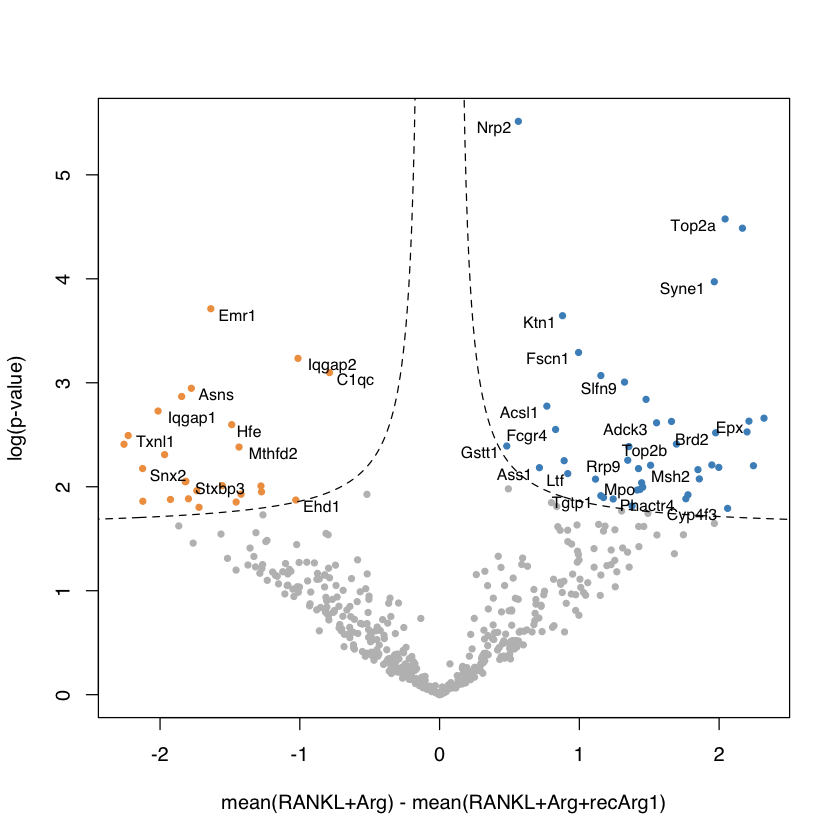

In [12]:
#pdf("volcanoPlotFiltering.pdf")
par(family = "sans", bg = "white")
ptsToLabelRight = c(139,441,24,38,268,147,112,331,132,307,284,419,181,301,184,306,325,291,10,221,3)
ptsToLabelLeft = c(222,290,208,258,490,151,286,507,451,282,385)
with(protFiltered, plot(LogPvalue ~ Difference, pch=20, col=color, ylab = "log(p-value)",
                       xlab = "mean(RANKL+Arg) - mean(RANKL+Arg+recArg1)"))
with(protFiltered[ptsToLabelLeft,], text(LogPvalue ~ Difference, labels = Gene.names, cex = 0.8, adj = c(-0.2,1)))
with(protFiltered[ptsToLabelRight,], text(LogPvalue ~ Difference, labels = Gene.names, cex = 0.8, adj = c(1.2,1)))
lines(protFilterCurve, lty = 2)
#dev.off()

In [13]:
# Used to find the list of proteins to annotate
# ptsToLabel = which(protFiltered$Significant == "+")
# with(protFiltered[ptsToLabelTest,], text(LogPvalue ~ Difference, labels = Gene.names, col = 2, cex = 0.8, adj = c(-.2,1)))
# ptsToLabelTest = sample(ptsToLabel, 30)
# print(ptsToLabelTest)
# protFiltered[ptsToLabelTest,7]

In [14]:
listDown = protFiltered[protFiltered$color == "#4A91C4",7]
listUp = protFiltered[protFiltered$color == "#F09F4E",7]

In [15]:
for (i in listDown){cat(i);cat("\n")}

Ktn1
Nudt16
Fcgr4
Slfn9
Acsl1
Smc4
Myo1e
Nrp2
F5
Ltf
Rrm2
Mpo
Ass1
Alox15
Msh2
Epx
Polr3b
Tgfbi
Jdp2
Top2a
Itprip
Pde2a
Lig1
Phactr4
Pes1
Cluh
Adck3
Fscn1
Tgtp1
Gstt1
Top2b
Syne1
Brd2
Mybbp1a
Prss34
Bsdc1
Nt5dc1
Rrp9
Ivns1abp
Cyp4f3
Serpinb1a
Ube2c
Cd97


In [16]:
for (i in listUp){cat(i);cat("\n")}

Arhgap12
Atg7
Ppfibp2
Psmb5
Mthfd2
Rbpj
Hfe
Vasp
C1qc
Iqgap2
Tgfbrap1
Stxbp3
Asns
Emr1
Trmt61a
Dennd6a
Sgta
9030624J02Rik
Txnl1
Yars
Lpxn
Snx2
Iqgap1
Sqrdl
Ehd1


In [17]:
for (i in protFiltered[rev(order(protFiltered$LogPvalue))[1:40],7]){cat(i);cat("\n")}

Nrp2
Top2a
Pde2a
Syne1
Emr1
Ktn1
Fscn1
Iqgap2
C1qc
Mybbp1a
Slfn9
Asns
Sqrdl
Nudt16
Acsl1
Iqgap1
Alox15
Epx
Ube2c
Adck3
Hfe
Fcgr4
Itprip
Brd2
Txnl1
Top2b
Lpxn
Gstt1
Rrm2
Mthfd2
Rbpj
Rrp9
Cluh
Tgfbi
Jdp2
Prss34
Smc4
Ass1
Snx2
Ivns1abp


### Comparison between arginine depletion and recArg1

In [18]:
# Load transformed data with t-test results
protFilteredDvr = read.table("Perseus_run/ProteinsTTestFiltered_deplVsRec.txt", sep = "\t", head=T, quote="")

In [19]:
names(protFilteredDvr)[2] <- "LogPvalue"
# Color for significant abundance changes
protFilteredDvr$color = ifelse(test = protFilteredDvr$Difference > 0, "#4A91C4", "#F09F4E")
protFilteredDvr[protFilteredDvr$Significant != "+", 93] = "grey"
protFilteredDvr$Gene.names <- as.character(protFilteredDvr$Gene.names)
# Keep only the first gene name when several are provided
protFilteredDvr[,7] <- sub(";.*", "", protFilteredDvr[,7])

In [20]:
# Threshold curve
protFilterCurveDvr = read.table("Perseus_run/ProteinsTTestFiltered_deplVsRec_Curve.txt", sep = "\t", head=T, quote="")

In [22]:
pdf("volcanoPlotFiltering_deplVsRec.pdf")
par(family = "sans", bg = "white")
ptsToLabelRight = c(221,32,155,245,197,112,461,251,114,168,3,56,100,259,225,110,173, 234, 173, 212,32,231,386,443,391)
ptsToLabelLeft = c(290,151,286,6,502,352,180,73,2,296,94,279)
with(protFilteredDvr, plot(LogPvalue ~ Difference, pch=20, col=color, ylab = "log(p-value)",
                       xlab = "mean(RANKL) - mean(RANKL+Arg+recArg1)"))
with(protFilteredDvr[ptsToLabelLeft,], text(LogPvalue ~ Difference, labels = Gene.names, cex = 0.8, adj = c(-0.2,1)))
with(protFilteredDvr[ptsToLabelRight,], text(LogPvalue ~ Difference, labels = Gene.names, cex = 0.8, adj = c(1.2,1)))
lines(protFilterCurveDvr, lty = 2)
dev.off()

pdf 
  2

### Effect of RANKL with and without arginine

In [23]:
# Load transformed data with t-test results
protFilteredRanklArg = read.table("Perseus_run/ProteinsTTestFiltered_rankl_Arg.txt", sep = "\t", head=T, quote="")
protFilteredRanklDep = read.table("Perseus_run/ProteinsTTestFiltered_rankl_noArg.txt", sep = "\t", head=T, quote="")

In [24]:
names(protFilteredRanklArg)[2] <- "LogPvalue"
names(protFilteredRanklDep)[2] <- "LogPvalue"
# Color for significant abundance changes
protFilteredRanklArg$color = ifelse(test = protFilteredRanklArg$Difference > 0, "#4A91C4", "#F09F4E")
protFilteredRanklArg[protFilteredRanklArg$Significant != "+", 93] = "grey"
protFilteredRanklArg$Gene.names <- as.character(protFilteredRanklArg$Gene.names)
# Keep only the first gene name when several are provided
protFilteredRanklArg[,7] <- sub(";.*", "", protFilteredRanklArg[,7])
# Color for significant abundance changes
protFilteredRanklDep$color = ifelse(test = protFilteredRanklDep$Difference > 0, "#4A91C4", "#F09F4E")
protFilteredRanklDep[protFilteredRanklDep$Significant != "+", 93] = "grey"
protFilteredRanklDep$Gene.names <- as.character(protFilteredRanklDep$Gene.names)
# Keep only the first gene name when several are provided
protFilteredRanklDep[,7] <- sub(";.*", "", protFilteredRanklDep[,7])

In [25]:
# Threshold curve
protFilterCurveRanklArg = read.table("Perseus_run/ProteinsTTestFiltered_rankl_Arg_Curve.txt", sep = "\t", head=T, quote="")
protFilterCurveRanklDep = read.table("Perseus_run/ProteinsTTestFiltered_rankl_noArg_Curve.txt", sep = "\t", head=T, quote="")

In [26]:
pdf("volcanoPlotFiltering_ranklArg.pdf")
par(family = "sans", bg = "white")
ptsToLabelRight =  c(290,6,352) #c(221,32,155,245,197,112,461,251,114,168,3,56,100,259,225,110,173, 234, 173, 212,32,231,386,443,391)
ptsToLabelLeft = c(221,155,151,245,197,112) #c(290,151,286,6,502,352,180,73,2,296,94,279)
with(protFilteredRanklArg, plot(LogPvalue ~ Difference, pch=20, col=color, ylab = "log(p-value)",
                       xlab = "mean(Arg) - mean(RANKL+Arg)"))
with(protFilteredRanklArg[ptsToLabelLeft,], text(LogPvalue ~ Difference, labels = Gene.names, cex = 0.8, adj = c(-0.2,1)))
with(protFilteredRanklArg[ptsToLabelRight,], text(LogPvalue ~ Difference, labels = Gene.names, cex = 0.8, adj = c(1.2,1)))
lines(protFilterCurveRanklArg, lty = 2)
dev.off()

pdf 
  2

In [27]:
pdf("volcanoPlotFiltering_ranklDep.pdf")
par(family = "sans", bg = "white")
ptsToLabelRight =  c(290,6,352) #c(221,32,155,245,197,112,461,251,114,168,3,56,100,259,225,110,173, 234, 173, 212,32,231,386,443,391)
ptsToLabelLeft = c(221,155,151,245,197,112) #c(290,151,286,6,502,352,180,73,2,296,94,279)
with(protFilteredRanklDep, plot(LogPvalue ~ Difference, pch=20, col=color, ylab = "log(p-value)",
                       xlab = "mean(MCSF) - mean(RANKL+MCSF)"))
with(protFilteredRanklDep[ptsToLabelLeft,], text(LogPvalue ~ Difference, labels = Gene.names, cex = 0.8, adj = c(-0.2,1)))
with(protFilteredRanklDep[ptsToLabelRight,], text(LogPvalue ~ Difference, labels = Gene.names, cex = 0.8, adj = c(1.2,1)))
lines(protFilterCurveRanklDep, lty = 2)
dev.off()

pdf 
  2

## Export for OmicsIntegrator

In [28]:
pf <- protFiltered
pf$Difference <- abs(pf$Difference)
write.table(pf[pf$Significant == "+",c(13,3)], "OmicsIntegratorRun/recArg1_prot.tsv", row.names = FALSE,
          col.names = FALSE, quote = FALSE, sep = "\t") 

In [29]:
pfd <- protFilteredDvr
pfd$Difference <- abs(pfd$Difference)
write.table(pfd[pfd$Significant == "+",c(13,3)], "OmicsIntegratorRun/deplOrRec_prot.tsv", row.names = FALSE,
          col.names = FALSE, quote = FALSE, sep = "\t") 

In [30]:
library(plyr)

mergedProtRANKL = cbind(protFilteredRanklArg[,c(1:3,13)], protFilteredRanklDep[,c(1:3,13)])

# Test if a protein with differential abundance for one condition have a different behavior for the other
checkIfDiff <- function(x){
    if (x[,1] == "+" & x[,5] == "+"){
        if (x[,3] > 0 & x[,7] < 0){
            return(1) # Prot abundance is up in presence of arginine and down without
        }
        if (x[,3] < 0 & x[,7] > 0){
            return(-1) # Prot abundance is down in presence of arginine and up without
        }
    }
    else if (x[,1] == "+"){
        if (x[,3] > max(0, x[,7] + 1)){
            return(1) # Prot abundance is up in presence of arginine, not without
        }
        if (x[,3] < min(0, x[,7] - 1)){
            return(-1) # Prot abundance is down in presence of arginine, not without
        }
    }
    else if (x[,5] == "+"){
        if (x[,7] > max(0, x[,3] + 1)){
            return(-1) # Prot abundance is up in absence of arginine, not with it
        }
        if (x[,7] < min(0, x[,3] - 1)){
            return(1) # Prot abundance is down in absence of arginine, not with it
        }
    }
    return(0)
}

protRanklGroup = adply(mergedProtRANKL, 1, checkIfDiff, .expand = FALSE)$V1


Attaching package: ‘plyr’

The following objects are masked from ‘package:plotly’:

    arrange, mutate, rename, summarise



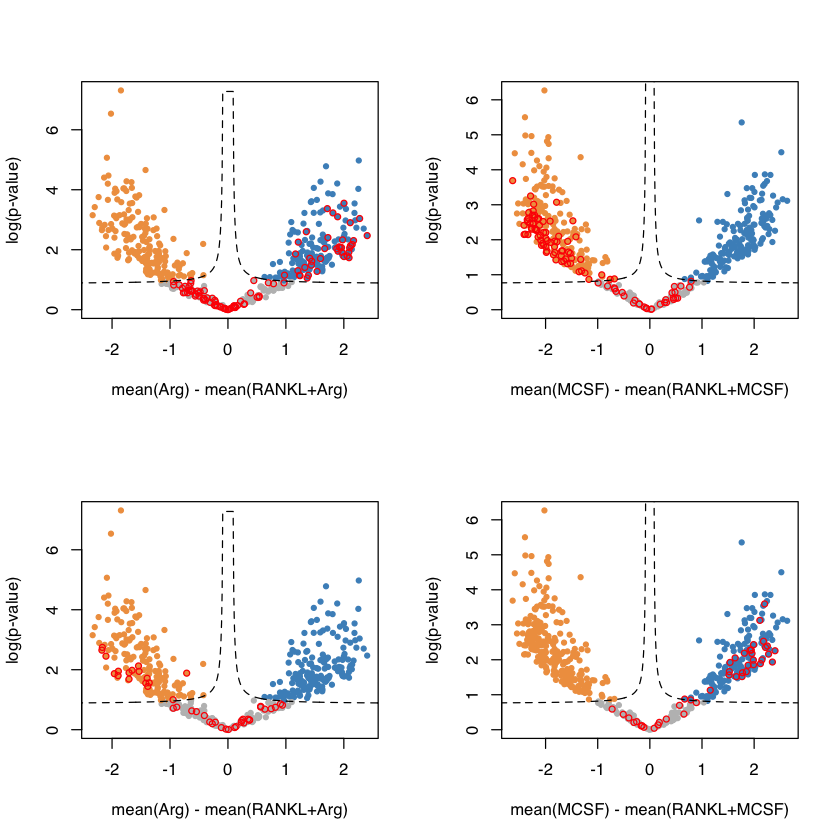

In [31]:
par(family = "sans", bg = "white", mfrow = c(2,2))
ptsToLabel = which(protRanklGroup == 1)
with(protFilteredRanklArg, plot(LogPvalue ~ Difference, pch=20, col=color, ylab = "log(p-value)",
                       xlab = "mean(Arg) - mean(RANKL+Arg)"))
with(protFilteredRanklArg[ptsToLabel,], points(LogPvalue ~ Difference, col = "red", cex = 0.8))
lines(protFilterCurveRanklArg, lty = 2)
ptsToLabel = which(protRanklGroup == 1)
with(protFilteredRanklDep, plot(LogPvalue ~ Difference, pch=20, col=color, ylab = "log(p-value)",
                       xlab = "mean(MCSF) - mean(RANKL+MCSF)"))
with(protFilteredRanklDep[ptsToLabel,], points(LogPvalue ~ Difference, col = "red", cex = 0.8))
lines(protFilterCurveRanklDep, lty = 2)
ptsToLabel = which(protRanklGroup == -1)
with(protFilteredRanklArg, plot(LogPvalue ~ Difference, pch=20, col=color, ylab = "log(p-value)",
                       xlab = "mean(Arg) - mean(RANKL+Arg)"))
with(protFilteredRanklArg[ptsToLabel,], points(LogPvalue ~ Difference, col = "red", cex = 0.8))
lines(protFilterCurveRanklArg, lty = 2)
ptsToLabel = which(protRanklGroup == -1)
with(protFilteredRanklDep, plot(LogPvalue ~ Difference, pch=20, col=color, ylab = "log(p-value)",
                       xlab = "mean(MCSF) - mean(RANKL+MCSF)"))
with(protFilteredRanklDep[ptsToLabel,], points(LogPvalue ~ Difference, col = "red", cex = 0.8))
lines(protFilterCurveRanklDep, lty = 2)

In [32]:
for (i in mergedProtRANKL[which(protRanklGroup == 1),4]){
    cat(strsplit(i, ";")[[1]][1], "\n")
}
for (i in mergedProtRANKL[which(protRanklGroup == -1),4]){
    cat(strsplit(i, ";")[[1]][1], "\n")
}

Prrc2c 
Atg7 
Mef2a 
Fubp3 
Pus7 
Inpp4a 
Carm1 
Mrps14 
Nedd4l 
Gm20425 
Oxr1 
Alcam 
Mars 
Bag1 
Maz 
Srp72 
Eml4 
Gtf2i 
Ckap5 
Adam10 
Srpk1 
Ada 
Pdia4 
Hsp90b1 
Anxa1 
Txn 
Cox4i1 
Ctsg 
Alox5ap 
Fkbp4 
Rbpj 
Map2k1 
Drg1 
Cnbp 
Adk 
Nadk 
Cpne2 
Hnrnpk 
Ywhaq 
Sbds 
G3bp1 
Lyar 
Trim21 
Nme7 
Tgfbrap1 
Ppm1h 
Ikbkb 
Vps41 
Nsrp1 
Fxr1 
Smad2 
Tacc3 
Dync1li2 
Rcc1 
Bnip1 
Tmed3 
Fbxo22 
Snd1 
Syncrip 
Nup214 
Ankrd13a 
Tecpr1 
Mtdh 
Ccdc50 
Wdr48 
Rcc2 
Dock1 
Sowahc 
Paox 
Thop1 
Heatr5b 
Prps1l1 
Txnl1 
Pus7l 
Ogt 
Hmgcs1 
Wrb 
Galm 
Colgalt1 
Arhgap9 
Pspc1 
Yars 
Dcxr 
Clns1a 
Mpi 
Hibadh 
Gins4 
Lpxn 
Psmd9 
Fam188a 
Bccip 
Sugt1 
Dimt1 
Ccdc124 
Ints5 
Ifi30 
Lztfl1 
Iqgap1 
Gltp 
Pin1 
Tbl2 
Ehd1 
Vars 
Dhx9 
Usp19 
Ap5s1 
Mospd2 
Ttc39c 
Pip5k1a 
Ints1 
Aldh1a7 
F5 
Rras 
Anxa6 
Stat3 
Epx 
Adcy7 
Anapc1 
Polr3b 
Sec61a1 
Rps10 
Anxa4 
Pstpip1 
Cyb5r4 
Cln5 
Pgap1 
9930111J21Rik1 
Cd47 
Abcf1 
Pgs1 
Sumf2 
Rap2c 
Crispld2 
Farsa 
Sp100 
Dohh 
Cyp4f3 
Tmem186 
Fam32a 
Ddx

In [42]:
table(protRanklGroup)/(44+365+103)

protRanklGroup
       -1         0         1 
0.0859375 0.7128906 0.2011719 

In [33]:
names(mergedProtRANKL) = make.names(names(mergedProtRANKL), unique = T)
mpr = mergedProtRANKL[c(which(protRanklGroup == 1), which(protRanklGroup == -1)),]
mpr = data.frame(mpr$Gene.name, apply(abs(mpr[,c(3,7)]), 1, max))
# Take abs big diff + Gene.name
write.table(mpr, "OmicsIntegratorRun/ranklDiff_prot.tsv", row.names = FALSE,
          col.names = FALSE, quote = FALSE, sep = "\t") 

In [34]:
sessionInfo()

R version 3.4.1 (2017-06-30)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Sierra 10.12.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.4/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] plyr_1.8.4           RColorBrewer_1.1-2   heatmaply_0.14.3    
[4] viridis_0.5.1        viridisLite_0.3.0    plotly_4.7.1        
[7] ggplot2_2.2.1        limma_3.34.9         BiocInstaller_1.28.0

loaded via a namespace (and not attached):
 [1] httr_1.3.1           tidyr_0.7.2          jsonlite_1.5        
 [4] foreach_1.4.4        gtools_3.5.0         shiny_1.0.5         
 [7] assertthat_0.2.0     stats4_3.4.1         yaml_2.1.18         
[10] robustbase_0.92-8    pillar_1.2.1         la